# Spam message classification using Support vector machine and Random Forest algorithm

Data Loading and Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/spam.tsv', sep ='\t')

In [6]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


check the null values

In [9]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [10]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


check the count of each class

In [11]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [12]:
df['label'].value_counts() / len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [13]:
ham  =  df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [15]:
ham.shape, spam.shape

((4825, 4), (747, 4))

to make the data balance we will no take only 747 random rows from ham class

In [24]:
ham = ham.sample(spam.shape[0])

In [25]:
ham.shape, spam.shape

((747, 4), (747, 4))

now both the classes are having equal rows

In [29]:
data = ham.append(spam, ignore_index=True)

In [30]:
data

,label,message,length,punct
0,ham,"Goodmorning, today i am late for 2hrs. Because...",60,3
1,ham,Big brother‘s really scraped the barrel with t...,74,0
2,ham,Mmmmm ... I loved waking to your words this mo...,158,7
3,ham,"Er yeah, i will b there at 15:26, sorry! Just ...",97,5
4,ham,No we sell it all so we'll have tons if coins....,126,6
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [31]:
data.shape

(1494, 4)

In [32]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

(array([354., 267., 290., 560.,   6.,   5.,   6.,   2.,   2.,   2.]),
 array([  3. ,  48.5,  94. , 139.5, 185. , 230.5, 276. , 321.5, 367. ,
        412.5, 458. ]),
 <a list of 10 Patch objects>)

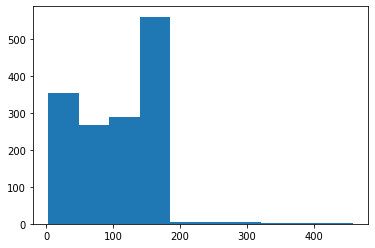

In [34]:
plt.hist(data['length'])

<function matplotlib.pyplot.show>

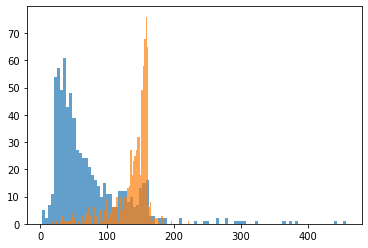

In [38]:
plt.hist(data[data['label']=='ham']['length'],bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['length'],bins = 100, alpha = 0.7)
plt.show

By the above plot we can see the span category has more number of words and it has higher probability that it will be in spam category

<function matplotlib.pyplot.show>

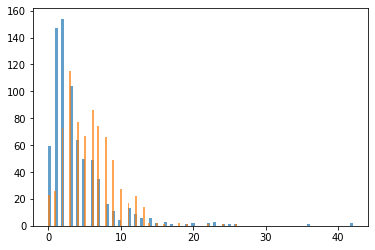

In [39]:
plt.hist(data[data['label']=='ham']['punct'],bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['punct'],bins = 100, alpha = 0.7)
plt.show

There is no much differentiating factor we can explain about the 'punct' varibale , in other words we can say that this feature doesn't help us in classification

# Model Building

create a train and test split

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=0, shuffle=True)

In [43]:
X_train.shape, X_test.shape

((1045,), (449,))

Apply random forest algorithm

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [51]:
classifier = Pipeline([("tfidf",TfidfVectorizer()), ("classifier",RandomForestClassifier(n_estimators=100))])

In [52]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

evaluate our model

In [53]:
y_pred = classifier.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [55]:
accuracy_score(y_test,y_pred)

0.9487750556792873

In [56]:
confusion_matrix(y_test,y_pred)

array([[227,   0],
       [ 23, 199]])

As per the above confusion matrix we can see there are 0 False negatives and 23 False positives

There are no ham messages classified as spam that is the good thing

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       227
        spam       1.00      0.90      0.95       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



building the support vector machines

In [61]:
from sklearn.svm import SVC

In [64]:
svm = classifier = Pipeline([("tfidf",TfidfVectorizer()), ("classifier",SVC(C=100,gamma='auto'))])

In [65]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [66]:
y_pred = svm.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred)

0.9420935412026726

In [68]:
confusion_matrix(y_test,y_pred)

array([[223,   4],
       [ 22, 200]])

using SVM we can see 4 ham messages classified as spam. which is not good because there may me some important messages which we can miss

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.98      0.94       227
        spam       0.98      0.90      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



#test cases

In [70]:
test1 = ['hello, you are learning natural language processing']
test2 = ['Hope you are doing good and learning new things']
test3 = ['congrats you have won a lottery ticket worth $1 million ! To claim call 044']

In [72]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [73]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
